In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve
from imblearn.pipeline import Pipeline
from sklearn import preprocessing

%matplotlib inline

In [3]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [4]:
df.shape

(13979592, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [6]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [7]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

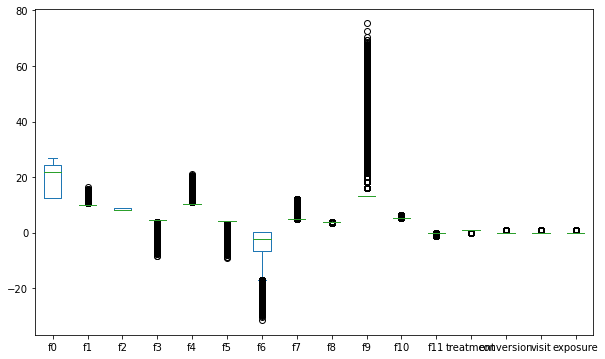

In [8]:
df.plot.box(figsize=(10,6))

In [9]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

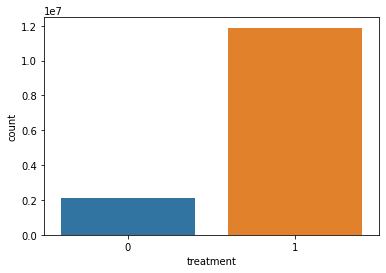

In [10]:
sns.countplot(x=df.treatment)

In [11]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

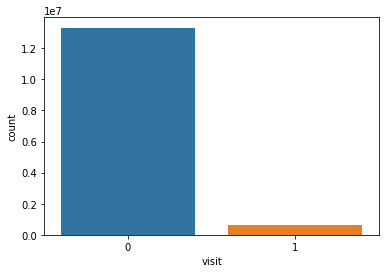

In [12]:
sns.countplot(x=df.visit)

In [13]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

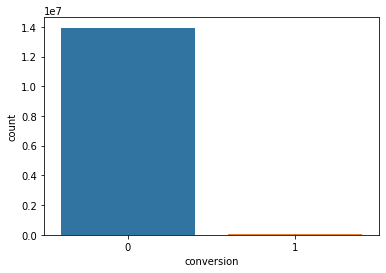

In [16]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

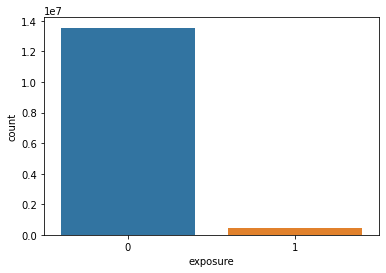

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

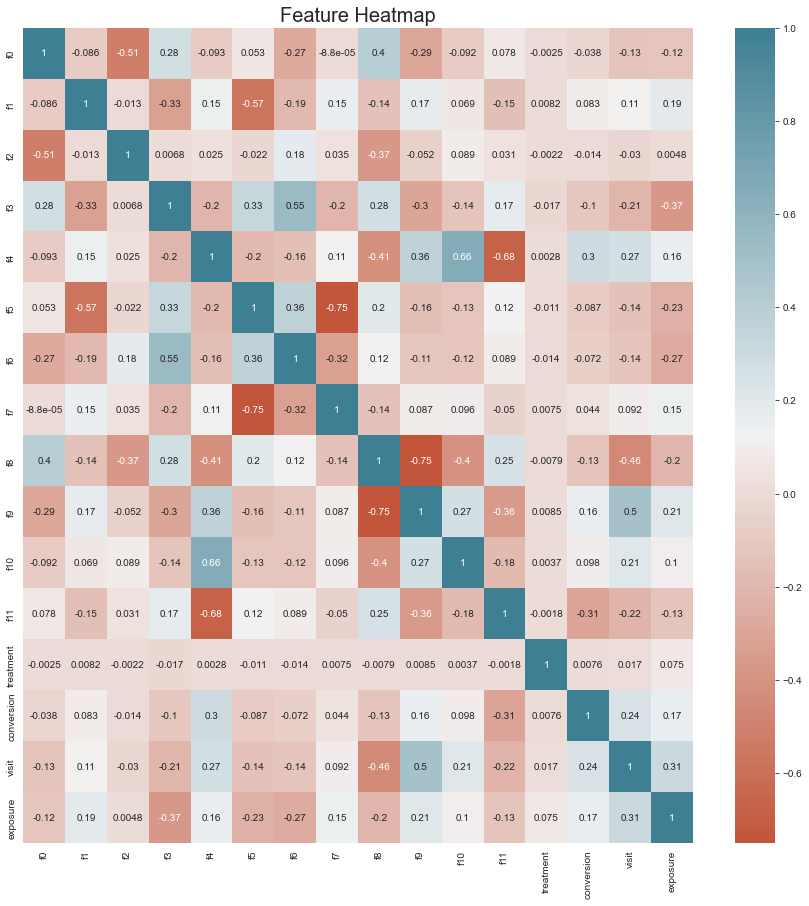

In [17]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [18]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [19]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [20]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [21]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [22]:
#Given the treatment, exposure and visits, how is the conversion?
df.groupby(['treatment','exposure','visit']).agg({'conversion':['mean','sum','count']})

conversion                 
                               mean    sum     count
treatment exposure visit                            
0         0        0       0.000000      0   2016832
                   1       0.050721   4063     80105
1         0        0       0.000000      0  11055129
                   1       0.034259  13680    399314
          1        0       0.000000      0    250702
                   1       0.129745  23031    177510

In [23]:
users_to_remove = df[(df['treatment'] == 1 ) & (df['exposure']==0)]

#New df based on the objective of the notebook
df_ml = df.drop(users_to_remove.index).reset_index().drop(['index','treatment', 'visit'], axis = 1)
df.shape


(13979592, 16)

In [23]:
df_ml.shape

(2525149, 14)

In [24]:
X = df_ml.drop(columns=['conversion','exposure'])

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525149 entries, 0 to 2525148
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
dtypes: float64(12)
memory usage: 231.2 MB


In [26]:
scaled = preprocessing.scale(df_ml.drop(['conversion','exposure'], axis = 1).values)
df_sca = pd.DataFrame(data=scaled, columns = df_ml.drop(['conversion','exposure'], axis = 1).columns)
df_exposure = df_ml['exposure']
df_conversion = df_ml['conversion']

<AxesSubplot:>

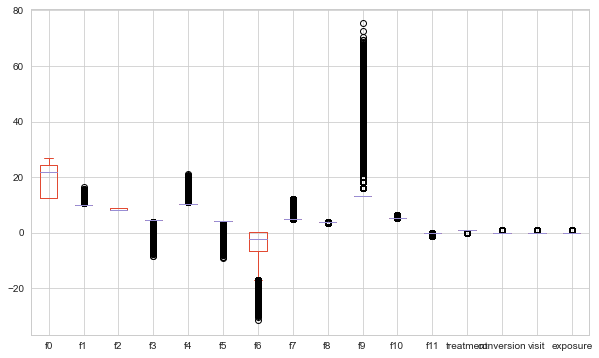

In [27]:
df.plot.box(figsize=(10,6))

<AxesSubplot:>

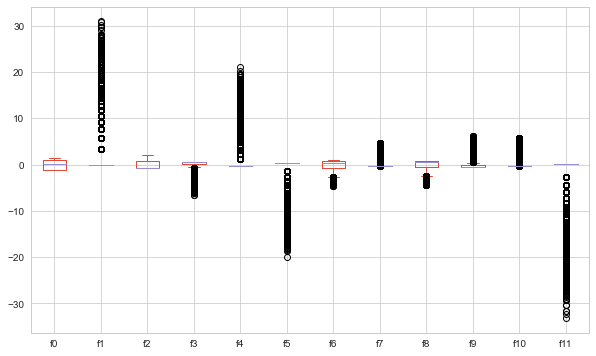

In [28]:
df_sca.plot.box(figsize=(10,6))

In [32]:
X=df_sca

In [33]:
treatment = df_ml['exposure']

In [34]:
y = df_ml['conversion']

In [35]:
models_results = {
    'approach': [],
    'uplift@30%': []}

In [36]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,treatment,y, random_state=23, stratify=treatment, test_size=0.33)

In [37]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(1691849, 12) (833300, 12) (1691849,) (833300,) (1691849,) (833300,)


In [38]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [39]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.227502
0:	learn: 0.1816475	total: 347ms	remaining: 5m 46s
1:	learn: 0.0603191	total: 517ms	remaining: 4m 18s
2:	learn: 0.0265698	total: 725ms	remaining: 4m
3:	learn: 0.0152389	total: 927ms	remaining: 3m 50s
4:	learn: 0.0114610	total: 1.1s	remaining: 3m 39s
5:	learn: 0.0099347	total: 1.29s	remaining: 3m 33s
6:	learn: 0.0092262	total: 1.45s	remaining: 3m 25s
7:	learn: 0.0088721	total: 1.65s	remaining: 3m 24s
8:	learn: 0.0086431	total: 1.85s	remaining: 3m 23s
9:	learn: 0.0085288	total: 2.05s	remaining: 3m 23s
10:	learn: 0.0084759	total: 2.23s	remaining: 3m 20s
11:	learn: 0.0084170	total: 2.42s	remaining: 3m 19s
12:	learn: 0.0083809	total: 2.6s	remaining: 3m 17s
13:	learn: 0.0083530	total: 2.78s	remaining: 3m 15s
14:	learn: 0.0083263	total: 2.97s	remaining: 3m 15s
15:	learn: 0.0083022	total: 3.17s	remaining: 3m 14s
16:	learn: 0.0082917	total: 3.35s	remaining: 3m 13s
17:	learn: 0.0082817	total: 3.53s	remaining: 3m 12s
18:	learn: 0.0082694	total: 3.71s	remaining: 3m 11

157:	learn: 0.0072327	total: 39.6s	remaining: 3m 30s
158:	learn: 0.0072297	total: 39.8s	remaining: 3m 30s
159:	learn: 0.0072258	total: 40s	remaining: 3m 30s
160:	learn: 0.0072235	total: 40.3s	remaining: 3m 29s
161:	learn: 0.0072209	total: 40.5s	remaining: 3m 29s
162:	learn: 0.0072122	total: 40.7s	remaining: 3m 29s
163:	learn: 0.0072047	total: 41s	remaining: 3m 28s
164:	learn: 0.0072037	total: 41.2s	remaining: 3m 28s
165:	learn: 0.0071982	total: 41.4s	remaining: 3m 28s
166:	learn: 0.0071948	total: 41.6s	remaining: 3m 27s
167:	learn: 0.0071885	total: 41.9s	remaining: 3m 27s
168:	learn: 0.0071804	total: 42.1s	remaining: 3m 26s
169:	learn: 0.0071739	total: 42.3s	remaining: 3m 26s
170:	learn: 0.0071697	total: 42.5s	remaining: 3m 25s
171:	learn: 0.0071668	total: 42.7s	remaining: 3m 25s
172:	learn: 0.0071616	total: 42.9s	remaining: 3m 25s
173:	learn: 0.0071539	total: 43.1s	remaining: 3m 24s
174:	learn: 0.0071480	total: 43.4s	remaining: 3m 24s
175:	learn: 0.0071469	total: 43.6s	remaining: 3m 2

313:	learn: 0.0066210	total: 1m 17s	remaining: 2m 50s
314:	learn: 0.0066186	total: 1m 18s	remaining: 2m 50s
315:	learn: 0.0066175	total: 1m 18s	remaining: 2m 50s
316:	learn: 0.0066120	total: 1m 18s	remaining: 2m 50s
317:	learn: 0.0066115	total: 1m 19s	remaining: 2m 50s
318:	learn: 0.0066088	total: 1m 19s	remaining: 2m 50s
319:	learn: 0.0066055	total: 1m 19s	remaining: 2m 49s
320:	learn: 0.0066013	total: 1m 20s	remaining: 2m 49s
321:	learn: 0.0066005	total: 1m 20s	remaining: 2m 49s
322:	learn: 0.0065972	total: 1m 20s	remaining: 2m 49s
323:	learn: 0.0065944	total: 1m 21s	remaining: 2m 49s
324:	learn: 0.0065909	total: 1m 21s	remaining: 2m 49s
325:	learn: 0.0065851	total: 1m 22s	remaining: 2m 49s
326:	learn: 0.0065827	total: 1m 22s	remaining: 2m 49s
327:	learn: 0.0065776	total: 1m 22s	remaining: 2m 49s
328:	learn: 0.0065746	total: 1m 23s	remaining: 2m 49s
329:	learn: 0.0065725	total: 1m 23s	remaining: 2m 49s
330:	learn: 0.0065693	total: 1m 24s	remaining: 2m 50s
331:	learn: 0.0065665	total:

465:	learn: 0.0062118	total: 1m 56s	remaining: 2m 13s
466:	learn: 0.0062109	total: 1m 56s	remaining: 2m 13s
467:	learn: 0.0062101	total: 1m 56s	remaining: 2m 12s
468:	learn: 0.0062075	total: 1m 56s	remaining: 2m 12s
469:	learn: 0.0062020	total: 1m 57s	remaining: 2m 12s
470:	learn: 0.0062011	total: 1m 57s	remaining: 2m 11s
471:	learn: 0.0061988	total: 1m 57s	remaining: 2m 11s
472:	learn: 0.0061944	total: 1m 57s	remaining: 2m 11s
473:	learn: 0.0061900	total: 1m 58s	remaining: 2m 11s
474:	learn: 0.0061896	total: 1m 58s	remaining: 2m 10s
475:	learn: 0.0061846	total: 1m 58s	remaining: 2m 10s
476:	learn: 0.0061831	total: 1m 58s	remaining: 2m 10s
477:	learn: 0.0061788	total: 1m 58s	remaining: 2m 9s
478:	learn: 0.0061774	total: 1m 59s	remaining: 2m 9s
479:	learn: 0.0061748	total: 1m 59s	remaining: 2m 9s
480:	learn: 0.0061720	total: 1m 59s	remaining: 2m 9s
481:	learn: 0.0061714	total: 1m 59s	remaining: 2m 8s
482:	learn: 0.0061693	total: 2m	remaining: 2m 8s
483:	learn: 0.0061665	total: 2m	remain

619:	learn: 0.0058601	total: 2m 33s	remaining: 1m 34s
620:	learn: 0.0058564	total: 2m 33s	remaining: 1m 33s
621:	learn: 0.0058551	total: 2m 34s	remaining: 1m 33s
622:	learn: 0.0058541	total: 2m 34s	remaining: 1m 33s
623:	learn: 0.0058526	total: 2m 34s	remaining: 1m 33s
624:	learn: 0.0058502	total: 2m 34s	remaining: 1m 32s
625:	learn: 0.0058455	total: 2m 35s	remaining: 1m 32s
626:	learn: 0.0058443	total: 2m 35s	remaining: 1m 32s
627:	learn: 0.0058426	total: 2m 35s	remaining: 1m 32s
628:	learn: 0.0058403	total: 2m 35s	remaining: 1m 31s
629:	learn: 0.0058384	total: 2m 36s	remaining: 1m 31s
630:	learn: 0.0058355	total: 2m 36s	remaining: 1m 31s
631:	learn: 0.0058336	total: 2m 36s	remaining: 1m 31s
632:	learn: 0.0058293	total: 2m 36s	remaining: 1m 30s
633:	learn: 0.0058268	total: 2m 37s	remaining: 1m 30s
634:	learn: 0.0058261	total: 2m 37s	remaining: 1m 30s
635:	learn: 0.0058226	total: 2m 37s	remaining: 1m 30s
636:	learn: 0.0058216	total: 2m 37s	remaining: 1m 29s
637:	learn: 0.0058180	total:

773:	learn: 0.0055548	total: 3m 9s	remaining: 55.4s
774:	learn: 0.0055523	total: 3m 9s	remaining: 55.2s
775:	learn: 0.0055511	total: 3m 10s	remaining: 54.9s
776:	learn: 0.0055491	total: 3m 10s	remaining: 54.7s
777:	learn: 0.0055477	total: 3m 10s	remaining: 54.4s
778:	learn: 0.0055451	total: 3m 11s	remaining: 54.2s
779:	learn: 0.0055431	total: 3m 11s	remaining: 54s
780:	learn: 0.0055413	total: 3m 11s	remaining: 53.7s
781:	learn: 0.0055392	total: 3m 11s	remaining: 53.5s
782:	learn: 0.0055374	total: 3m 12s	remaining: 53.3s
783:	learn: 0.0055357	total: 3m 12s	remaining: 53s
784:	learn: 0.0055354	total: 3m 12s	remaining: 52.8s
785:	learn: 0.0055331	total: 3m 12s	remaining: 52.5s
786:	learn: 0.0055301	total: 3m 13s	remaining: 52.3s
787:	learn: 0.0055255	total: 3m 13s	remaining: 52.1s
788:	learn: 0.0055231	total: 3m 13s	remaining: 51.8s
789:	learn: 0.0055227	total: 3m 14s	remaining: 51.6s
790:	learn: 0.0055216	total: 3m 14s	remaining: 51.3s
791:	learn: 0.0055203	total: 3m 14s	remaining: 51.1s

929:	learn: 0.0053108	total: 3m 50s	remaining: 17.3s
930:	learn: 0.0053084	total: 3m 50s	remaining: 17.1s
931:	learn: 0.0053069	total: 3m 50s	remaining: 16.9s
932:	learn: 0.0053048	total: 3m 51s	remaining: 16.6s
933:	learn: 0.0053023	total: 3m 51s	remaining: 16.4s
934:	learn: 0.0052999	total: 3m 51s	remaining: 16.1s
935:	learn: 0.0052982	total: 3m 51s	remaining: 15.9s
936:	learn: 0.0052957	total: 3m 52s	remaining: 15.6s
937:	learn: 0.0052950	total: 3m 52s	remaining: 15.4s
938:	learn: 0.0052932	total: 3m 52s	remaining: 15.1s
939:	learn: 0.0052915	total: 3m 52s	remaining: 14.9s
940:	learn: 0.0052903	total: 3m 53s	remaining: 14.6s
941:	learn: 0.0052898	total: 3m 53s	remaining: 14.4s
942:	learn: 0.0052876	total: 3m 53s	remaining: 14.1s
943:	learn: 0.0052855	total: 3m 53s	remaining: 13.9s
944:	learn: 0.0052835	total: 3m 54s	remaining: 13.6s
945:	learn: 0.0052830	total: 3m 54s	remaining: 13.4s
946:	learn: 0.0052815	total: 3m 54s	remaining: 13.1s
947:	learn: 0.0052803	total: 3m 54s	remaining:

86:	learn: 0.1506289	total: 8.19s	remaining: 1m 25s
87:	learn: 0.1505991	total: 8.26s	remaining: 1m 25s
88:	learn: 0.1505792	total: 8.33s	remaining: 1m 25s
89:	learn: 0.1505275	total: 8.41s	remaining: 1m 25s
90:	learn: 0.1505071	total: 8.49s	remaining: 1m 24s
91:	learn: 0.1504811	total: 8.56s	remaining: 1m 24s
92:	learn: 0.1504563	total: 8.64s	remaining: 1m 24s
93:	learn: 0.1504332	total: 8.71s	remaining: 1m 23s
94:	learn: 0.1503919	total: 8.79s	remaining: 1m 23s
95:	learn: 0.1503756	total: 8.86s	remaining: 1m 23s
96:	learn: 0.1503256	total: 8.93s	remaining: 1m 23s
97:	learn: 0.1503086	total: 8.99s	remaining: 1m 22s
98:	learn: 0.1502719	total: 9.06s	remaining: 1m 22s
99:	learn: 0.1502312	total: 9.13s	remaining: 1m 22s
100:	learn: 0.1502094	total: 9.2s	remaining: 1m 21s
101:	learn: 0.1501875	total: 9.27s	remaining: 1m 21s
102:	learn: 0.1501687	total: 9.35s	remaining: 1m 21s
103:	learn: 0.1501481	total: 9.41s	remaining: 1m 21s
104:	learn: 0.1501325	total: 9.48s	remaining: 1m 20s
105:	lea

246:	learn: 0.1467476	total: 18.7s	remaining: 57.1s
247:	learn: 0.1467261	total: 18.8s	remaining: 57s
248:	learn: 0.1467088	total: 18.9s	remaining: 56.9s
249:	learn: 0.1466891	total: 18.9s	remaining: 56.8s
250:	learn: 0.1466599	total: 19s	remaining: 56.7s
251:	learn: 0.1466404	total: 19.1s	remaining: 56.6s
252:	learn: 0.1466098	total: 19.1s	remaining: 56.5s
253:	learn: 0.1465964	total: 19.2s	remaining: 56.4s
254:	learn: 0.1465720	total: 19.3s	remaining: 56.3s
255:	learn: 0.1465465	total: 19.3s	remaining: 56.1s
256:	learn: 0.1465251	total: 19.4s	remaining: 56s
257:	learn: 0.1464989	total: 19.4s	remaining: 55.9s
258:	learn: 0.1464798	total: 19.5s	remaining: 55.8s
259:	learn: 0.1464587	total: 19.6s	remaining: 55.7s
260:	learn: 0.1464322	total: 19.6s	remaining: 55.6s
261:	learn: 0.1464048	total: 19.7s	remaining: 55.5s
262:	learn: 0.1463749	total: 19.8s	remaining: 55.4s
263:	learn: 0.1463501	total: 19.8s	remaining: 55.3s
264:	learn: 0.1463321	total: 19.9s	remaining: 55.2s
265:	learn: 0.1463

407:	learn: 0.1436107	total: 29.8s	remaining: 43.2s
408:	learn: 0.1435906	total: 29.8s	remaining: 43.1s
409:	learn: 0.1435666	total: 29.9s	remaining: 43s
410:	learn: 0.1435366	total: 30s	remaining: 43s
411:	learn: 0.1435213	total: 30.1s	remaining: 42.9s
412:	learn: 0.1434966	total: 30.2s	remaining: 42.9s
413:	learn: 0.1434839	total: 30.3s	remaining: 42.8s
414:	learn: 0.1434630	total: 30.3s	remaining: 42.8s
415:	learn: 0.1434474	total: 30.4s	remaining: 42.7s
416:	learn: 0.1434275	total: 30.5s	remaining: 42.6s
417:	learn: 0.1434161	total: 30.6s	remaining: 42.6s
418:	learn: 0.1433946	total: 30.6s	remaining: 42.5s
419:	learn: 0.1433763	total: 30.7s	remaining: 42.4s
420:	learn: 0.1433650	total: 30.8s	remaining: 42.4s
421:	learn: 0.1433476	total: 30.9s	remaining: 42.3s
422:	learn: 0.1433330	total: 31s	remaining: 42.2s
423:	learn: 0.1433133	total: 31s	remaining: 42.2s
424:	learn: 0.1432876	total: 31.1s	remaining: 42.1s
425:	learn: 0.1432658	total: 31.2s	remaining: 42s
426:	learn: 0.1432516	to

569:	learn: 0.1409088	total: 40.7s	remaining: 30.7s
570:	learn: 0.1408808	total: 40.8s	remaining: 30.6s
571:	learn: 0.1408577	total: 40.8s	remaining: 30.6s
572:	learn: 0.1408428	total: 40.9s	remaining: 30.5s
573:	learn: 0.1408320	total: 41s	remaining: 30.4s
574:	learn: 0.1408173	total: 41s	remaining: 30.3s
575:	learn: 0.1407997	total: 41.1s	remaining: 30.3s
576:	learn: 0.1407740	total: 41.2s	remaining: 30.2s
577:	learn: 0.1407624	total: 41.2s	remaining: 30.1s
578:	learn: 0.1407486	total: 41.3s	remaining: 30s
579:	learn: 0.1407381	total: 41.4s	remaining: 29.9s
580:	learn: 0.1407273	total: 41.4s	remaining: 29.9s
581:	learn: 0.1407035	total: 41.5s	remaining: 29.8s
582:	learn: 0.1406928	total: 41.6s	remaining: 29.7s
583:	learn: 0.1406757	total: 41.6s	remaining: 29.6s
584:	learn: 0.1406533	total: 41.7s	remaining: 29.6s
585:	learn: 0.1406344	total: 41.7s	remaining: 29.5s
586:	learn: 0.1406138	total: 41.8s	remaining: 29.4s
587:	learn: 0.1405977	total: 41.9s	remaining: 29.3s
588:	learn: 0.1405

728:	learn: 0.1383087	total: 52.4s	remaining: 19.5s
729:	learn: 0.1382903	total: 52.4s	remaining: 19.4s
730:	learn: 0.1382862	total: 52.5s	remaining: 19.3s
731:	learn: 0.1382649	total: 52.6s	remaining: 19.2s
732:	learn: 0.1382515	total: 52.6s	remaining: 19.2s
733:	learn: 0.1382303	total: 52.7s	remaining: 19.1s
734:	learn: 0.1382185	total: 52.8s	remaining: 19s
735:	learn: 0.1382040	total: 52.8s	remaining: 19s
736:	learn: 0.1381822	total: 52.9s	remaining: 18.9s
737:	learn: 0.1381707	total: 53s	remaining: 18.8s
738:	learn: 0.1381512	total: 53.1s	remaining: 18.7s
739:	learn: 0.1381357	total: 53.2s	remaining: 18.7s
740:	learn: 0.1381243	total: 53.2s	remaining: 18.6s
741:	learn: 0.1381083	total: 53.3s	remaining: 18.5s
742:	learn: 0.1380760	total: 53.4s	remaining: 18.5s
743:	learn: 0.1380588	total: 53.4s	remaining: 18.4s
744:	learn: 0.1380432	total: 53.5s	remaining: 18.3s
745:	learn: 0.1380248	total: 53.6s	remaining: 18.2s
746:	learn: 0.1380080	total: 53.6s	remaining: 18.2s
747:	learn: 0.1379

889:	learn: 0.1359124	total: 1m 8s	remaining: 8.51s
890:	learn: 0.1358965	total: 1m 8s	remaining: 8.43s
891:	learn: 0.1358783	total: 1m 9s	remaining: 8.35s
892:	learn: 0.1358592	total: 1m 9s	remaining: 8.28s
893:	learn: 0.1358495	total: 1m 9s	remaining: 8.21s
894:	learn: 0.1358358	total: 1m 9s	remaining: 8.14s
895:	learn: 0.1358189	total: 1m 9s	remaining: 8.06s
896:	learn: 0.1358059	total: 1m 9s	remaining: 7.99s
897:	learn: 0.1357849	total: 1m 9s	remaining: 7.91s
898:	learn: 0.1357680	total: 1m 9s	remaining: 7.84s
899:	learn: 0.1357521	total: 1m 9s	remaining: 7.76s
900:	learn: 0.1357372	total: 1m 9s	remaining: 7.68s
901:	learn: 0.1357223	total: 1m 10s	remaining: 7.61s
902:	learn: 0.1357082	total: 1m 10s	remaining: 7.53s
903:	learn: 0.1356926	total: 1m 10s	remaining: 7.45s
904:	learn: 0.1356818	total: 1m 10s	remaining: 7.38s
905:	learn: 0.1356638	total: 1m 10s	remaining: 7.3s
906:	learn: 0.1356535	total: 1m 10s	remaining: 7.22s
907:	learn: 0.1356435	total: 1m 10s	remaining: 7.15s
908:	l

In [40]:
uplift_tm = tm.predict(X_test)

In [41]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.5350


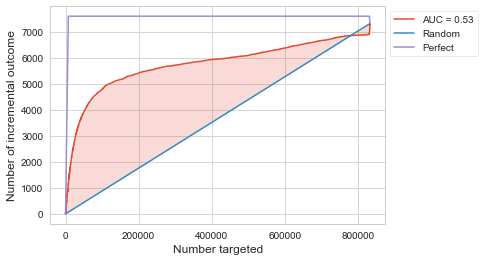

In [42]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);